In [1]:
import os, random, shutil
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
train_dir = 'data'
validation_dir = 'validation'


In [3]:
total_train = 0
for c in ['elliptical', 'uncertain', 'spiral']:
  total_train += len(os.listdir(os.path.join(train_dir, c)))
print('Total train:', total_train)

total_validation = 0
for c in ['elliptical', 'uncertain', 'spiral']:
  total_validation += len(os.listdir(os.path.join(validation_dir, c)))
print('Total validation:', total_validation)

Total train: 18198
Total validation: 4576


In [10]:
# Create the generators for the training and validation data
# Data Augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                    rescale=1.0/255,
                    rotation_range=25,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.2)
validation_datagen  = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255.)

# Use the flow_from_directory() method with the appropriate directory and
# the lists of images for the training and validation sets
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=34,
                                                    shuffle=True,
                                                    class_mode='categorical')
validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         target_size=(150,150),
                                                         batch_size=34,
                                                         shuffle=False,
                                                         class_mode='categorical')

Found 18198 images belonging to 3 classes.
Found 4576 images belonging to 3 classes.


In [11]:
#Convolutional neural network model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(150, 150, 3)))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 67500)             0         
                                                                 
 dense_8 (Dense)             (None, 256)               17280256  
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 3)                 195       
                                                                 
Total params: 17,321,603
Trainable params: 17,321,603
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

hist = model.fit(train_generator,
                    epochs=200,
                    validation_data=validation_generator,
                    verbose=1,
                    callbacks=[early_stopping])

Epoch 1/200
536/536 [==============================] - 250s 465ms/step - loss: 0.5027 - accuracy: 0.8220 - val_loss: 0.3210 - val_accuracy: 0.8907
Epoch 2/200
536/536 [==============================] - 198s 369ms/step - loss: 0.3478 - accuracy: 0.8747 - val_loss: 0.4507 - val_accuracy: 0.8304
Epoch 3/200
536/536 [==============================] - 182s 339ms/step - loss: 0.3238 - accuracy: 0.8832 - val_loss: 0.2726 - val_accuracy: 0.9052
Epoch 4/200
536/536 [==============================] - 178s 332ms/step - loss: 0.2935 - accuracy: 0.8941 - val_loss: 0.2495 - val_accuracy: 0.9084
Epoch 5/200
536/536 [==============================] - 179s 333ms/step - loss: 0.2840 - accuracy: 0.8956 - val_loss: 0.2504 - val_accuracy: 0.9119
Epoch 6/200
536/536 [==============================] - 179s 333ms/step - loss: 0.2689 - accuracy: 0.9008 - val_loss: 0.2479 - val_accuracy: 0.9139
Epoch 7/200
536/536 [==============================] - 190s 355ms/step - loss: 0.2686 - accuracy: 0.9013 - val_loss: 0

In [13]:
# Deep neural network

modelb = tf.keras.Sequential()

modelb.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
modelb.add(tf.keras.layers.MaxPooling2D((2, 2)))
modelb.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
modelb.add(tf.keras.layers.MaxPooling2D((2, 2)))
modelb.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
modelb.add(tf.keras.layers.MaxPooling2D((2, 2)))
modelb.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
modelb.add(tf.keras.layers.MaxPooling2D((2, 2)))
modelb.add(tf.keras.layers.Flatten())
modelb.add(tf.keras.layers.Dense(512, activation='relu'))
modelb.add(tf.keras.layers.Dense(3, activation='softmax'))
modelb.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelb.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)     

In [14]:
modelb.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

hist_b = modelb.fit(train_generator,
                    epochs=200,
                    validation_data=validation_generator,
                    verbose=1,
                    callbacks=[early_stopping])

Epoch 1/200
536/536 [==============================] - 358s 665ms/step - loss: 0.2939 - accuracy: 0.8861 - val_loss: 0.2020 - val_accuracy: 0.9342
Epoch 2/200
536/536 [==============================] - 353s 658ms/step - loss: 0.1781 - accuracy: 0.9353 - val_loss: 0.1670 - val_accuracy: 0.9447
Epoch 3/200
536/536 [==============================] - 368s 687ms/step - loss: 0.1331 - accuracy: 0.9496 - val_loss: 0.1348 - val_accuracy: 0.9484
Epoch 4/200
536/536 [==============================] - 355s 662ms/step - loss: 0.1315 - accuracy: 0.9514 - val_loss: 0.1526 - val_accuracy: 0.9423
Epoch 5/200
536/536 [==============================] - 350s 654ms/step - loss: 0.1269 - accuracy: 0.9527 - val_loss: 0.0847 - val_accuracy: 0.9688
Epoch 6/200
536/536 [==============================] - 348s 649ms/step - loss: 0.1023 - accuracy: 0.9620 - val_loss: 0.0910 - val_accuracy: 0.9642
Epoch 7/200
536/536 [==============================] - 344s 642ms/step - loss: 0.1074 - accuracy: 0.9601 - val_loss: 0

In [16]:
#InceptionV3 model from google

from tensorflow.keras.applications import InceptionV3

modelc = InceptionV3(include_top=True, weights=None, input_tensor=None, input_shape=(150,150,3), classes=3)
modelc.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelc.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_4[0][0]']               
 alization)                                                                                       
                                                                                       

 batch_normalization_10 (BatchN  (None, 16, 16, 96)  288         ['conv2d_14[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 16, 32)  96          ['conv2d_15[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_24 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_27 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 16, 16, 48)  144         ['conv2d_24[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 16, 16, 96)  288         ['conv2d_27[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_38 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 7, 7, 128)   384         ['conv2d_38[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_39 (Conv2D)             (None, 7, 7, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_49 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 7, 7, 160)   480         ['conv2d_49[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_45

 batch_normalization_55 (BatchN  (None, 7, 7, 160)   480         ['conv2d_59[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_60 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 7, 7, 160)   480         ['conv2d_55[0][0]']              
 ormalizat

 conv2d_65 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_70 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 7, 7, 192)   576         ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 7, 7, 192)   576         ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 7, 7, 192)   576         ['conv2d_78[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_75 (Conv2D)             (None, 3, 3, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 3, 3, 192)   576         ['conv2d_88[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 3, 3, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

In [17]:
hist_c = modelc.fit(train_generator,
                    epochs=200,
                    validation_data=validation_generator,
                    verbose=1,
                    callbacks=[early_stopping])

Epoch 1/200
536/536 [==============================] - 1185s 2s/step - loss: 0.3538 - accuracy: 0.8788 - val_loss: 6.9075 - val_accuracy: 0.6862
Epoch 2/200
536/536 [==============================] - 1151s 2s/step - loss: 0.2365 - accuracy: 0.9161 - val_loss: 1.3964 - val_accuracy: 0.6073
Epoch 3/200
536/536 [==============================] - 1156s 2s/step - loss: 0.2031 - accuracy: 0.9248 - val_loss: 0.2408 - val_accuracy: 0.8875
Epoch 4/200
536/536 [==============================] - 1161s 2s/step - loss: 0.1567 - accuracy: 0.9430 - val_loss: 0.8486 - val_accuracy: 0.8250
Epoch 5/200
536/536 [==============================] - 1154s 2s/step - loss: 0.1457 - accuracy: 0.9460 - val_loss: 0.3854 - val_accuracy: 0.8610
Epoch 6/200
536/536 [==============================] - 1146s 2s/step - loss: 0.1398 - accuracy: 0.9463 - val_loss: 0.1265 - val_accuracy: 0.9545
Epoch 7/200
536/536 [==============================] - 1149s 2s/step - loss: 0.1268 - accuracy: 0.9529 - val_loss: 0.3004 - val_ac

In [18]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Instantiate the pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet',
                         include_top=False,
                         input_shape=(150,150,3))

# Freeze the layers of the pre-trained model
base_model.trainable = False

# Add new layers to the model
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
predictions = tf.keras.layers.Dense(3, activation='softmax')(x)

# Define the new model
modeld = tf.keras.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
modeld.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modeld.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_98 (Conv2D)             (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_98[0][0]']              
 ormalization)                                                                                    
                                                                                              

 batch_normalization_104 (Batch  (None, 16, 16, 96)  288         ['conv2d_108[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 16, 16, 32)  96          ['conv2d_109[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_99 (Activation)     (None, 16, 16, 64)   0           ['batch_normalization_99[0][0]'] 
                                                                                                  
 activation_101 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_101[0][0]']
                                                                                                  
 activatio

 conv2d_118 (Conv2D)            (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_121 (Conv2D)            (None, 16, 16, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_normalization_114 (Batch  (None, 16, 16, 48)  144         ['conv2d_118[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_117 (Batch  (None, 16, 16, 96)  288         ['conv2d_121[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

                                                                  'max_pooling2d_10[0][0]']       
                                                                                                  
 conv2d_132 (Conv2D)            (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 7, 7, 128)   384         ['conv2d_132[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_128 (Activation)    (None, 7, 7, 128)    0           ['batch_normalization_128[0][0]']
                                                                                                  
 conv2d_133 (Conv2D)            (None, 7, 7, 128)    114688      ['activation_128[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_143 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_138[0][0]']         
                                                                                                  
 batch_normalization_139 (Batch  (None, 7, 7, 160)   480         ['conv2d_143[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_139 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_139[0][0]']
          

                                                                                                  
 batch_normalization_149 (Batch  (None, 7, 7, 160)   480         ['conv2d_153[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_149[0][0]']
                                                                                                  
 conv2d_149 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_154 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_149[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_159 (Conv2D)            (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_164 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_159[0][0]']         
                                                                                                  
 batch_normalization_155 (Batch  (None, 7, 7, 192)   576         ['conv2d_159[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_160 (Batch  (None, 7, 7, 192)   576         ['conv2d_164[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_164 (Batch  (None, 7, 7, 192)   576         ['conv2d_168[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_168 (Batch  (None, 7, 7, 192)   576         ['conv2d_172[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_164 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_164[0][0]']
                                                                                                  
 activation_168 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_168[0][0]']
                                                                                                  
 conv2d_16

                                                                                                  
 activation_173 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_173[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_177[0][0]']
                                                                                                  
 batch_normalization_178 (Batch  (None, 3, 3, 192)   576         ['conv2d_182[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

                                                                                                  
 batch_normalization_187 (Batch  (None, 3, 3, 192)   576         ['conv2d_191[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 3, 3, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_181[0][0]',         
                                                                  'activation_182[0][0]']         
                                                                                                  
 concatenate_3 (Concatenate)    (None, 3, 3, 768)    0           ['activation_185[0][0]',         
          

In [31]:


early_stopping = EarlyStopping(monitor='val_loss', patience=5)

hist_d = model.fit(train_generator, 
          epochs=200, 
          validation_data=validation_generator,
          callbacks=[early_stopping])

Epoch 1/200
536/536 [==============================] - 236s 441ms/step - loss: 0.1711 - accuracy: 0.9350 - val_loss: 0.1644 - val_accuracy: 0.9421
Epoch 2/200
536/536 [==============================] - 165s 308ms/step - loss: 0.1796 - accuracy: 0.9320 - val_loss: 0.1674 - val_accuracy: 0.9395
Epoch 3/200
536/536 [==============================] - 165s 308ms/step - loss: 0.1765 - accuracy: 0.9348 - val_loss: 0.1738 - val_accuracy: 0.9344
Epoch 4/200
536/536 [==============================] - 159s 297ms/step - loss: 0.1716 - accuracy: 0.9361 - val_loss: 0.1722 - val_accuracy: 0.9388
Epoch 5/200
536/536 [==============================] - 165s 308ms/step - loss: 0.1691 - accuracy: 0.9363 - val_loss: 0.1639 - val_accuracy: 0.9421
Epoch 6/200
536/536 [==============================] - 169s 315ms/step - loss: 0.1670 - accuracy: 0.9342 - val_loss: 0.1716 - val_accuracy: 0.9371
Epoch 7/200
536/536 [==============================] - 166s 310ms/step - loss: 0.1724 - accuracy: 0.9349 - val_loss: 0

In [71]:
from tensorflow.keras.preprocessing import image
import numpy as np
# Load the image
img = image.load_img('C:/Users/3196s/OneDrive/Desktop/Python/gmclassification/154554.jpg', target_size=(150, 150))

# Convert the image to a numpy array
x = image.img_to_array(img)

# Add an extra dimension to the array for the batch dimension
x = np.expand_dims(x, axis=0)

# Normalize the image data
x = x / 255.

# Get the model's predictions
predictions = model.predict(x)

# Print the predictions
print('Model prediction:', predictions[0])

if predictions[0][0] > predictions[0][1] and predictions[0][0] > predictions[0][2]:
    print('Model prediction: [1, 0, 0]. Its an Elliptical galaxy')
elif predictions[0][1] > predictions[0][0] and predictions[0][1] > predictions[0][2]:
    print('Model prediction: [0, 1, 0]. Its an Spiral galaxy')
else:
    print('Model prediction: [0, 0, 1]. Its an Uncertain galaxy')
predictions = modelb.predict(x)
print('Model_B prediction:', predictions[0])
if predictions[0][0] > predictions[0][1] and predictions[0][0] > predictions[0][2]:
    print('Model_B prediction: [1, 0, 0]. Its an Elliptical galaxy')
elif predictions[0][1] > predictions[0][0] and predictions[0][1] > predictions[0][2]:
    print('Model_B prediction: [0, 1, 0]. Its an Spiral galaxy')
elif predictions[0][2] > predictions[0][0] and predictions[0][2] > predictions[0][1]:
    print('Model_B prediction: [0, 0, 1]. Its an Uncertain galaxy')
    
predictions = modelc.predict(x)
print('Model_C prediction:', predictions[0])
if predictions[0][0] > predictions[0][1] and predictions[0][0] > predictions[0][2]:
    print('Model_C prediction: [1, 0, 0]. Its an Elliptical galaxy')
elif predictions[0][1] > predictions[0][0] and predictions[0][1] > predictions[0][2]:
    print('Model_C prediction: [0, 1, 0]. Its an Spiral galaxy')
elif predictions[0][2] > predictions[0][0] and predictions[0][2] > predictions[0][1]:
    print('Model_C prediction: [0, 0, 1]. Its an Uncertain galaxy')

1/1 [==============================] - 1s 605ms/step
Model prediction: [6.3649177e-06 1.3095427e-02 9.8689818e-01]
Model prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 90ms/step
Model_B prediction: [1.4234330e-03 9.7460434e-04 9.9760193e-01]
Model_B prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 1s 659ms/step
Model_C prediction: [0.00223147 0.00861117 0.9891573 ]
Model_C prediction: [0, 0, 1]. Its an Uncertain galaxy


In [70]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np

# Define the directory containing the images
img_dir = 'C:/Users/3196s/OneDrive/Desktop/Python/gmclassification/new try/data2/'

# Define the directories for saving the images based on predictions
elliptical_dir = 'C:/Users/3196s/OneDrive/Desktop/Python/gmclassification/new try/elliptical/'
spiral_dir = 'C:/Users/3196s/OneDrive/Desktop/Python/gmclassification/new try/spiral/'
uncertain_dir = 'C:/Users/3196s/OneDrive/Desktop/Python/gmclassification/new try/uncertain/'

# Loop through all the images in the directory
for filename in os.listdir(img_dir):
    # Load the image
    img = image.load_img(img_dir + filename, target_size=(150, 150))

    # Convert the image to a numpy array
    x = image.img_to_array(img)

    # Add an extra dimension to the array for the batch dimension
    x = np.expand_dims(x, axis=0)

    # Normalize the image data
    x = x / 255.

    # Get the predictions from the first model
    predictions = modelb.predict(x)

    # Check the predictions and save the image in the appropriate directory
    if predictions[0][0] > predictions[0][1] and predictions[0][0] > predictions[0][2]:
        image.save_img(elliptical_dir + filename, img)
        #print(f'{filename} is an elliptical galaxy')
    elif predictions[0][1] > predictions[0][0] and predictions[0][1] > predictions[0][2]:
        image.save_img(spiral_dir + filename, img)
        #print(f'{filename} is a spiral galaxy')
    else:
        image.save_img(uncertain_dir + filename, img)
        #print(f'{filename} is an uncertain galaxy')

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 37ms/step


In [32]:
#use predict to test
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

actualList = []
predictListA = []
predictListB = []
predictListC = []
predictListD = []
for i in range(45):
    # Load the image
    for c in ['Elliptical', 'Uncertain','Spiral']:  
        randomPic = random.choice(os.listdir(os.path.join(train_dir,c)))
        s = os.path.join(os.path.join(train_dir,c),randomPic)
        img = image.load_img(s, target_size=(150, 150))
        actualList.append(c)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x / 255.
    
        #modelA making prediction
        predictions = model.predict(x)
        if predictions[0][0] > predictions[0][1] and predictions[0][0] > predictions[0][2]:
            print('ModelA prediction: [1, 0, 0]. Its an Elliptical galaxy')
            predictListA.append("Elliptical")
        elif predictions[0][1] > predictions[0][0] and predictions[0][1] > predictions[0][2]:
            print('ModelA prediction: [0, 1, 0]. Its an Spiral galaxy')
            predictListA.append("Spiral")
        else:
            print('ModelA prediction: [0, 0, 1]. Its an Uncertain galaxy')
            predictListA.append("Uncertain")
            
        #modelB making prediction
        predictions = modelb.predict(x)
        if predictions[0][0] > predictions[0][1] and predictions[0][0] > predictions[0][2]:
            print('ModelB prediction: [1, 0, 0]. Its an Elliptical galaxy')
            predictListB.append("Elliptical")
        elif predictions[0][1] > predictions[0][0] and predictions[0][1] > predictions[0][2]:
            print('ModelB prediction: [0, 1, 0]. Its an Spiral galaxy')
            predictListB.append("Spiral")
        else:
            print('ModelB prediction: [0, 0, 1]. Its an Uncertain galaxy')
            predictListB.append("Uncertain")
        
        #modelC making prediction
        predictions = modelc.predict(x)
        if predictions[0][0] > predictions[0][1] and predictions[0][0] > predictions[0][2]:
            print('ModelC prediction: [1, 0, 0]. Its an Elliptical galaxy')
            predictListC.append("Elliptical")
        elif predictions[0][1] > predictions[0][0] and predictions[0][1] > predictions[0][2]:
            print('ModelC prediction: [0, 1, 0]. Its an Spiral galaxy')
            predictListC.append("Spiral")
        else:
            print('ModelC prediction: [0, 0, 1]. Its an Uncertain galaxy')
            predictListC.append("Uncertain")
            
        #modelD making prediction
        predictions = modeld.predict(x)
        if predictions[0][0] > predictions[0][1] and predictions[0][0] > predictions[0][2]:
            print('ModelD prediction: [1, 0, 0]. Its an Elliptical galaxy')
            predictListD.append("Elliptical")
        elif predictions[0][1] > predictions[0][0] and predictions[0][1] > predictions[0][2]:
            print('ModelD prediction: [0, 1, 0]. Its an Spiral galaxy')
            predictListD.append("Spiral")
        else:
            print('ModelD prediction: [0, 0, 1]. Its an Uncertain galaxy')
            predictListD.append("Uncertain")
            
        
labels=["Elliptical","Spiral","Uncertain",]

1/1 [==============================] - 0s 49ms/step
ModelA prediction: [1, 0, 0]. Its an Elliptical galaxy
1/1 [==============================] - 0s 213ms/step
ModelB prediction: [1, 0, 0]. Its an Elliptical galaxy
1/1 [==============================] - 0s 277ms/step
ModelC prediction: [1, 0, 0]. Its an Elliptical galaxy
1/1 [==============================] - 0s 309ms/step
ModelD prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 23ms/step
ModelA prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 29ms/step
ModelB prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 48ms/step
ModelC prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 38ms/step
ModelD prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 28ms/step
ModelA prediction: [0, 1, 0]. Its an Spiral galaxy
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 38ms/step
ModelC prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 34ms/step
ModelD prediction: [1, 0, 0]. Its an Elliptical galaxy
1/1 [==============================] - 0s 23ms/step
ModelA prediction: [0, 1, 0]. Its an Spiral galaxy
1/1 [==============================] - 0s 21ms/step
ModelB prediction: [0, 1, 0]. Its an Spiral galaxy
1/1 [==============================] - 0s 41ms/step
ModelC prediction: [0, 1, 0]. Its an Spiral galaxy
1/1 [==============================] - 0s 38ms/step
ModelD prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 24ms/step
ModelA prediction: [1, 0, 0]. Its an Elliptical galaxy
1/1 [==============================] - 0s 23ms/step
ModelB prediction: [1, 0, 0]. Its an Elliptical galaxy
1/1 [==============================] - 0s 38ms/step
ModelC prediction: [1, 0, 0]. Its an Elliptical galaxy
1/1 [==============================] - 0s 36ms/step

1/1 [==============================] - 0s 23ms/step
ModelA prediction: [1, 0, 0]. Its an Elliptical galaxy
1/1 [==============================] - 0s 21ms/step
ModelB prediction: [1, 0, 0]. Its an Elliptical galaxy
1/1 [==============================] - 0s 35ms/step
ModelC prediction: [1, 0, 0]. Its an Elliptical galaxy
1/1 [==============================] - 0s 34ms/step
ModelD prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 29ms/step
ModelA prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 21ms/step
ModelB prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 31ms/step
ModelC prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 32ms/step
ModelD prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 21ms/step
ModelA prediction: [0, 1, 0]. Its an Spiral galaxy
1/1 [==============================] - 0s 21ms

1/1 [==============================] - 0s 33ms/step
ModelC prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 34ms/step
ModelD prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 22ms/step
ModelA prediction: [0, 1, 0]. Its an Spiral galaxy
1/1 [==============================] - 0s 22ms/step
ModelB prediction: [0, 1, 0]. Its an Spiral galaxy
1/1 [==============================] - 0s 33ms/step
ModelC prediction: [0, 1, 0]. Its an Spiral galaxy
1/1 [==============================] - 0s 32ms/step
ModelD prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 26ms/step
ModelA prediction: [1, 0, 0]. Its an Elliptical galaxy
1/1 [==============================] - 0s 21ms/step
ModelB prediction: [1, 0, 0]. Its an Elliptical galaxy
1/1 [==============================] - 0s 35ms/step
ModelC prediction: [1, 0, 0]. Its an Elliptical galaxy
1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 22ms/step
ModelA prediction: [1, 0, 0]. Its an Elliptical galaxy
1/1 [==============================] - 0s 28ms/step
ModelB prediction: [1, 0, 0]. Its an Elliptical galaxy
1/1 [==============================] - 0s 35ms/step
ModelC prediction: [1, 0, 0]. Its an Elliptical galaxy
1/1 [==============================] - 0s 38ms/step
ModelD prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 22ms/step
ModelA prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 22ms/step
ModelB prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 36ms/step
ModelC prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 33ms/step
ModelD prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 21ms/step
ModelA prediction: [0, 1, 0]. Its an Spiral galaxy
1/1 [==============================] - 0s 22ms

1/1 [==============================] - 0s 32ms/step
ModelC prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 34ms/step
ModelD prediction: [1, 0, 0]. Its an Elliptical galaxy
1/1 [==============================] - 0s 22ms/step
ModelA prediction: [0, 1, 0]. Its an Spiral galaxy
1/1 [==============================] - 0s 24ms/step
ModelB prediction: [0, 1, 0]. Its an Spiral galaxy
1/1 [==============================] - 0s 34ms/step
ModelC prediction: [0, 1, 0]. Its an Spiral galaxy
1/1 [==============================] - 0s 33ms/step
ModelD prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 22ms/step
ModelA prediction: [1, 0, 0]. Its an Elliptical galaxy
1/1 [==============================] - 0s 21ms/step
ModelB prediction: [1, 0, 0]. Its an Elliptical galaxy
1/1 [==============================] - 0s 35ms/step
ModelC prediction: [1, 0, 0]. Its an Elliptical galaxy
1/1 [==============================] - 0s 34ms/step

1/1 [==============================] - 0s 22ms/step
ModelA prediction: [1, 0, 0]. Its an Elliptical galaxy
1/1 [==============================] - 0s 24ms/step
ModelB prediction: [1, 0, 0]. Its an Elliptical galaxy
1/1 [==============================] - 0s 36ms/step
ModelC prediction: [1, 0, 0]. Its an Elliptical galaxy
1/1 [==============================] - 0s 38ms/step
ModelD prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 23ms/step
ModelA prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 22ms/step
ModelB prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 33ms/step
ModelC prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 37ms/step
ModelD prediction: [0, 0, 1]. Its an Uncertain galaxy
1/1 [==============================] - 0s 22ms/step
ModelA prediction: [0, 1, 0]. Its an Spiral galaxy
1/1 [==============================] - 0s 21ms

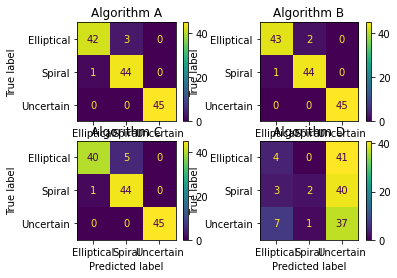

In [33]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
#Plot them

fig, ax = plt.subplots(2,2)
ax[0,0].set_title("Algorithm A")
ax[0,1].set_title("Algorithm B")
ax[1,0].set_title("Algorithm C")
ax[1,1].set_title("Algorithm D")
metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(actualList,predictListA), 
display_labels = labels).plot(ax=ax[0,0])

metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(actualList,predictListB), 
display_labels = labels).plot(ax=ax[0,1]);

metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(actualList,predictListC), 
display_labels = labels).plot(ax=ax[1,0])

metrics.ConfusionMatrixDisplay(
confusion_matrix = metrics.confusion_matrix(actualList,predictListD), 
display_labels = labels).plot(ax=ax[1,1]);
plt.show()


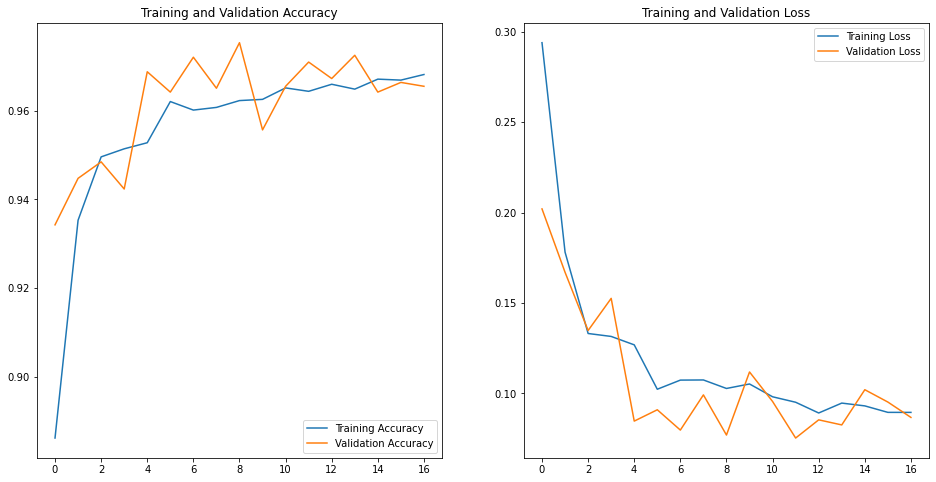

In [29]:
acc = hist_b.history['accuracy']
val_acc = hist_b.history['val_accuracy']

loss = hist_b.history['loss']
val_loss = hist_b.history['val_loss']

epochs_range = range(len(acc))  # range for the number of epochs

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./plots-v2.png')
plt.show()